In [12]:
from create_data import PersonDataset
from mrcnn import utils, visualize
import mrcnn.model as modellib
from PIL import Image, ImageDraw
from mrcnn.config import Config
import numpy as np

In [3]:
# Create train data

train_data = PersonDataset()
train_data.load_data('./data/coco_train.json')
train_data.prepare()

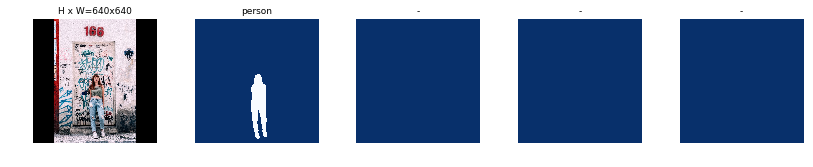

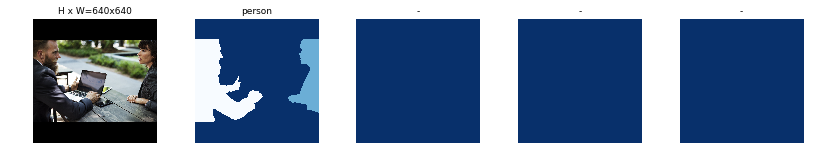

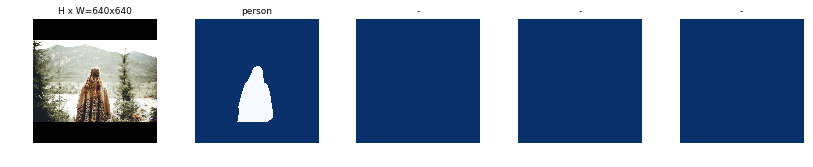

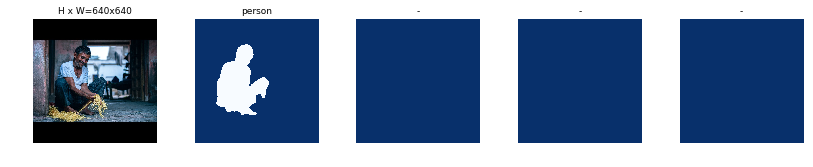

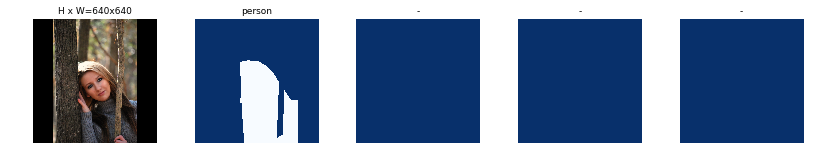

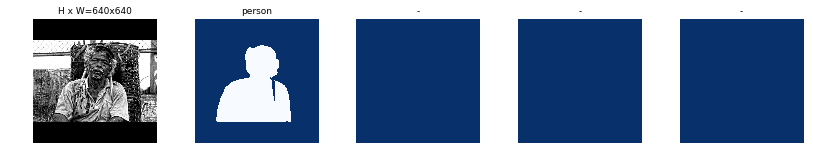

In [8]:
# View sample images

image_ids = np.random.choice(train_data.image_ids, 6)
for image_id in image_ids:
    image = train_data.load_image(image_id)
    mask, class_ids = train_data.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, train_data.class_names)

In [15]:
# Set configs for training
class PeopleConfig(Config):
    '''Set configs based on pre-existing config class'''
    NAME = 'person'
    GPU_COUNT = 1
    IMAGES_PER_CPU = 2
    NUM_CLASSES = 2 #Including background
    IMAGE_MIN_DIM = 640
    IMAGE_MAX_DIM = 640
    STEPS_PER_EPOCH = 100
    VALIDATION_STEPS = 5 #How often validation is run
    BACKBONE = 'resnet100'
    RPN_ANCHOR_SCALES = (8, 16, 32, 64, 128)
    TRAIN_ROIS_PER_IMAGE = 32
    MAX_GT_INSTANCES = 50 
    POST_NMS_ROIS_INFERENCE = 500 
    POST_NMS_ROIS_TRAINING = 1000 

config = PeopleConfig()
config.display()


Configurations:
BACKBONE                       resnet100
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_CPU                 2
IMAGES_PER_GPU                 2
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  640
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  640
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [640 640   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE          

In [16]:
# Create model
model = modellib.MaskRCNN(mode="training", config=config,
                          model_dir=MODEL_DIR)

NameError: name 'MODEL_DIR' is not defined